# <center><u>GRIP- The Sparks Foundation</u></center> 
## Data Science and Buisness Analytics Internship
## Prediction using Decision Tree Algorithm(Level - Intermediate)

# Author : Rajeev Nayan

#### Task-3 : Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

### Importing the required libraries

In [128]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline

### Reading the data 

In [129]:
df=pd.read_csv("SampleSuperstore.csv")

In [130]:
df.head()  # first five row of the dataset 

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [131]:
print("segment",df.Segment.unique())
print("ship mode",df['Ship Mode'].unique())
print("Country",df.Country.unique())
print("City",df.City.nunique())
print("State",df.State.nunique())
print("Postal code",df['Postal Code'].nunique())
print("Region",df.Region.unique())
print("Category",df.Category.unique())
print("Sub category",df['Sub-Category'].unique())
print("Quantity",df.Quantity.unique())
print("Discount",df.Discount.sum())
print("Sales",df.Sales.sum())
print("Profit",df.Profit.sum())


segment ['Consumer' 'Corporate' 'Home Office']
ship mode ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Country ['United States']
City 531
State 49
Postal code 631
Region ['South' 'West' 'Central' 'East']
Category ['Furniture' 'Office Supplies' 'Technology']
Sub category ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
Quantity [ 2  3  5  7  4  6  9  1  8 14 11 13 10 12]
Discount 1561.09
Sales 2297200.8603
Profit 286397.0217


### Exploratory data analysis 

In [132]:
df.shape       # rows and columns in the dataset

(9994, 13)

In [133]:
df.columns     # view all the columns/feature names 

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [134]:
df.dtypes     # view the data types of each column

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [135]:
df.isnull().sum()     # checking for any null value 

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [136]:
df.duplicated().sum()   # checking for any duplicate values 

17

In [137]:
df[df.duplicated()==True]   # rows having duplicate values 

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [138]:
df.drop_duplicates(keep='first',inplace=True)     # dropping the duplicates 

In [139]:
df.shape                        # checking the shape after dropping the duplicates

(9977, 13)

In [140]:
df.Country.value_counts()       # checking country column 

United States    9977
Name: Country, dtype: int64

`since, here we observe that this dataset only tells about united sates.
 therefore, we drop the column country.                                 `

In [141]:
df.drop('Country',axis=1,inplace=True) # dropping the country column from the dataset

In [142]:
df.Category.unique()                # unique values in category column

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [143]:
df.Category.value_counts()          # total data points for each unique values in category column

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [144]:
df['Sub-Category'].nunique()        # total no. of unique values in sub-category column

17

In [145]:
df['Sub-Category'].value_counts()   # unique values in sub-category column 

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [146]:
df.Segment.unique()                 # unique values in segment column

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [147]:
df.Segment.value_counts()           # total data points for each unique values in segment column 

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

### Data Visualization

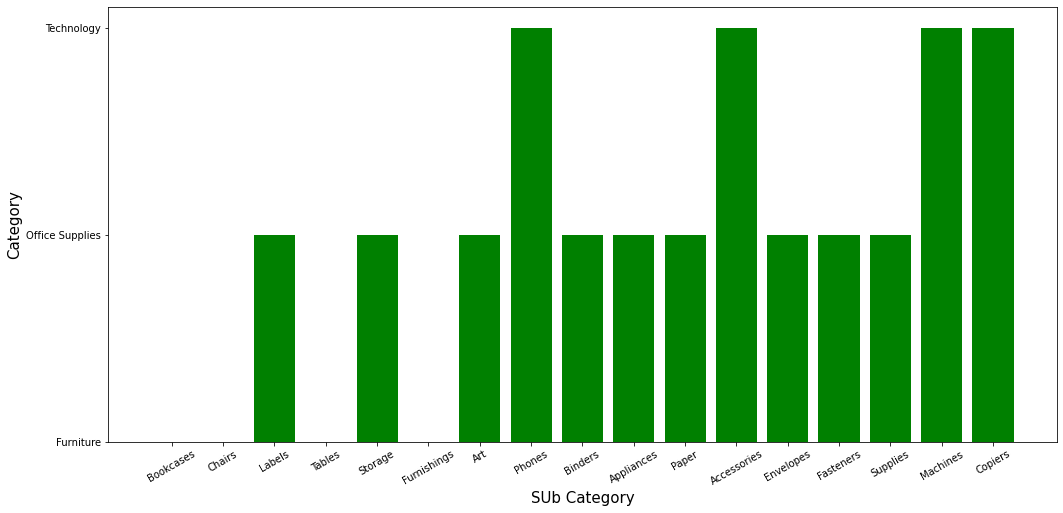

In [148]:
# plotting the category vs subcategory 
plt.figure(figsize=(17,8))
plt.bar('Sub-Category','Category',data=df,color='g')
plt.xlabel('SUb Category',size=15)
plt.ylabel('Category',size=15)
plt.xticks(rotation=30)
plt.show()

`From this bar plot we can note that the supply/demand are higher in the office supply Category`

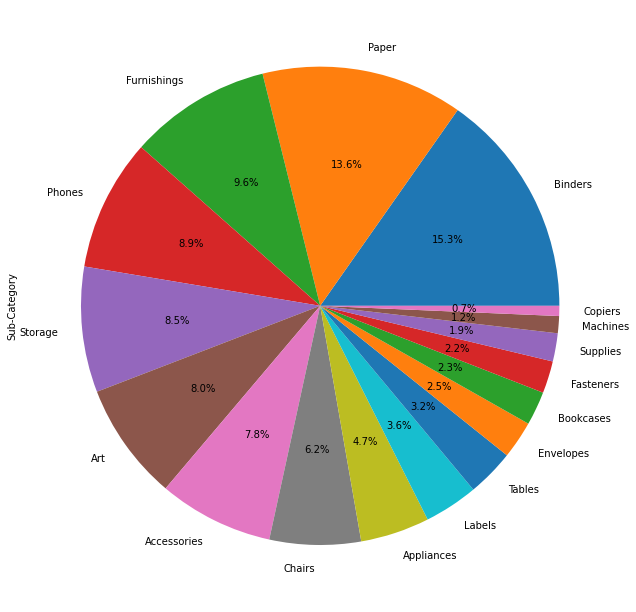

In [149]:
# pie plot of total percentage of subcategories in the dataset
plt.figure(figsize=(15,11))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

`From this pie Plot we can note that the store has wide office supplies especially in Binders, Paper` 

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


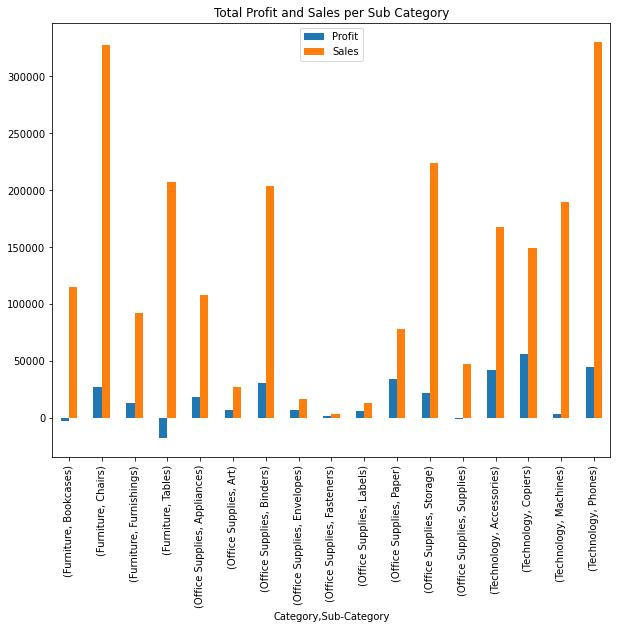

In [150]:
# category/sub-category vs sales/profit
df.groupby(['Category','Sub-Category'])['Profit','Sales'].sum().plot.bar(figsize=(10,8))
plt.title('Total Profit and Sales per Sub Category')
plt.legend(loc='upper center')
plt.show()

`Here we can note that the Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high    compared to other products.`

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


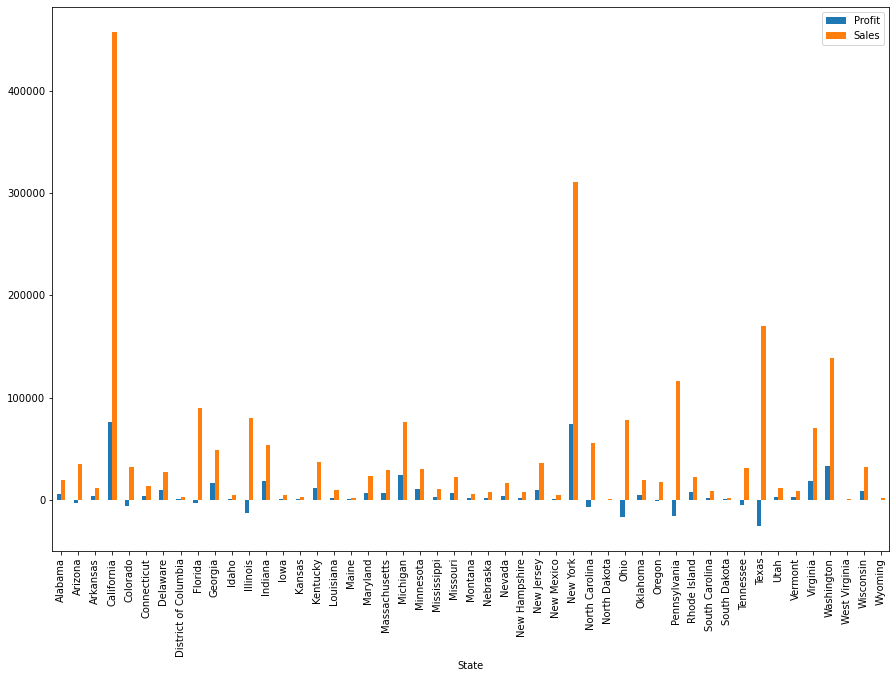

In [151]:
# bar plot of state vs Profit/Sales 
df.groupby('State')['Profit','Sales'].sum().plot.bar(figsize=(15,10))
plt.show()

`From here we can note that instead of being the selling price too much higher the state California,NewYork are making huge       profits.So these are the states in which most of the rich people lives `

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


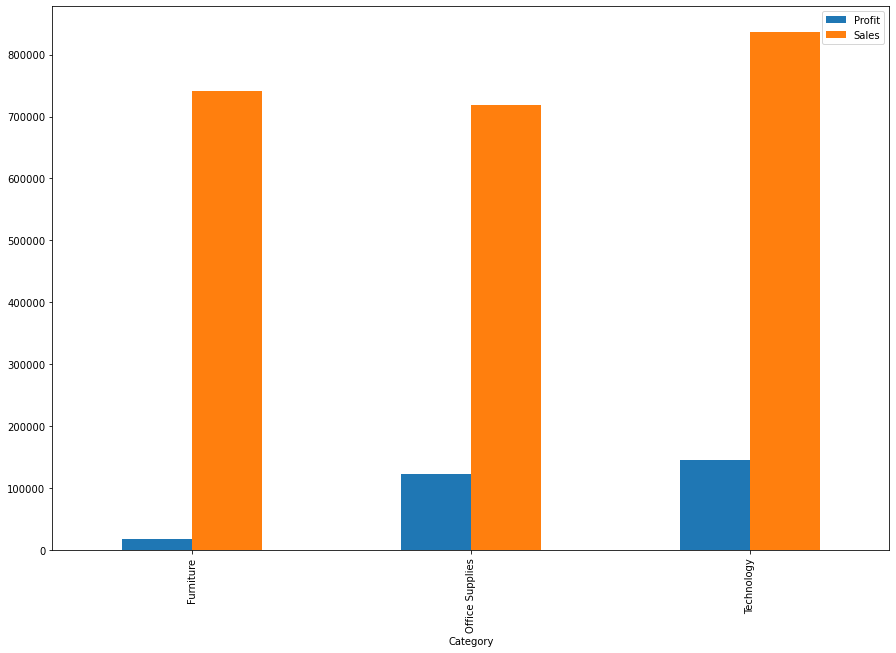

In [156]:
df.groupby('Category')['Profit','Sales'].sum().plot.bar(figsize=(15,10))
plt.show()

In [ ]:
`The selling price is higher in 

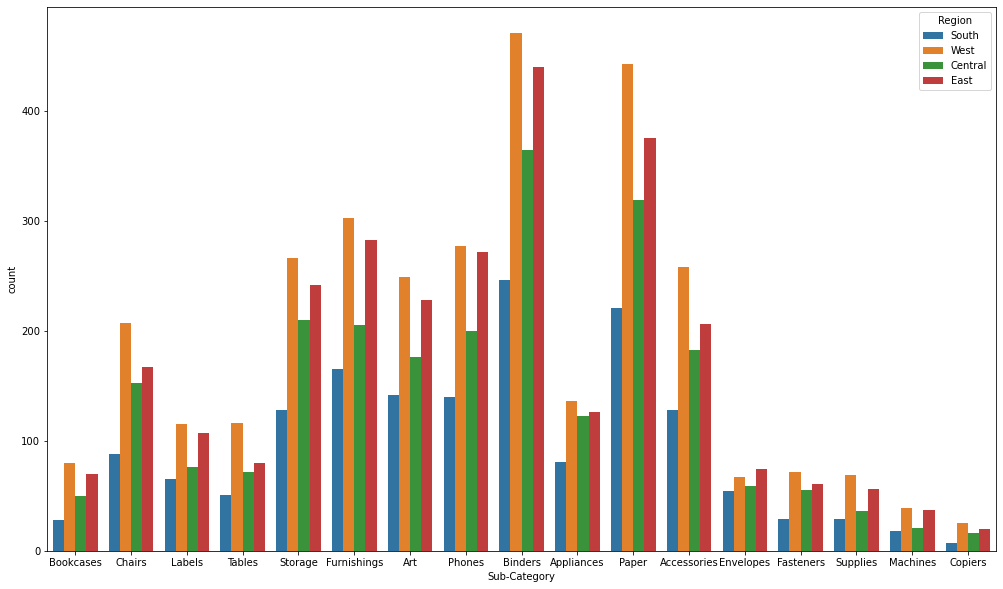

In [152]:

plt.figure(figsize=(17,10))
sns.countplot(x='Sub-Category',hue='Region',data=df)
plt.show()

`This is the following sequence (west>east>central>south) in each Sub Category `

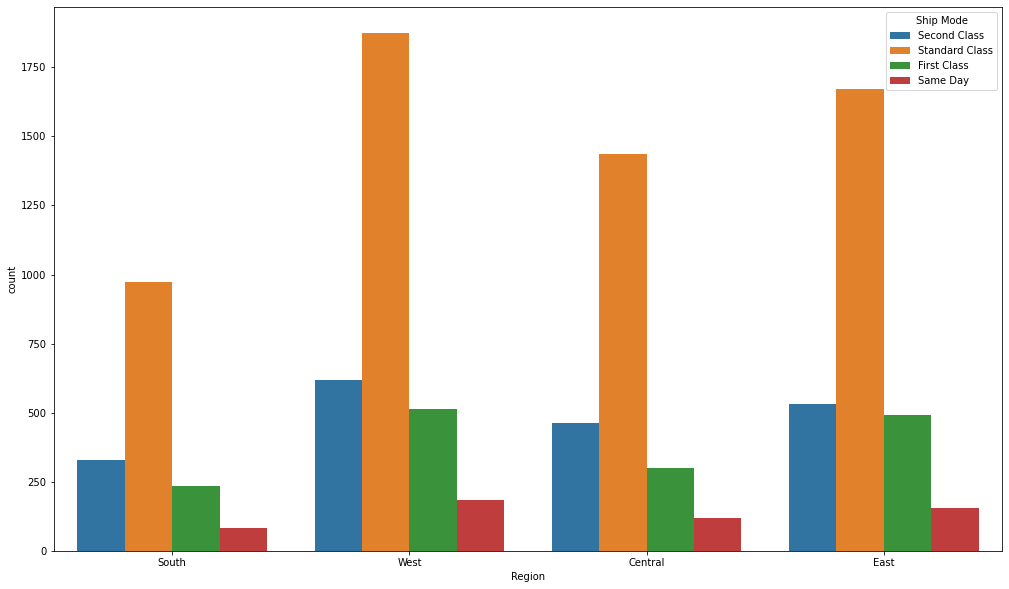

In [26]:
plt.figure(figsize=(17,10))
sns.countplot(x='Region',hue='Ship Mode',data=df)
plt.show()

`From here we note that for all the regions the ship mode are in the following sequence standard>second>first>same class`

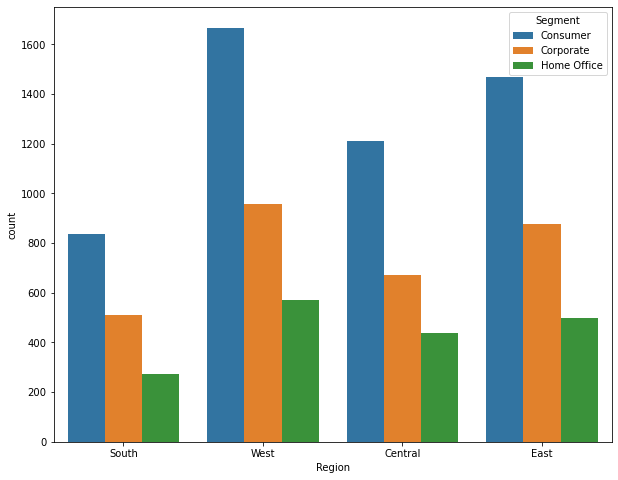

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(x='Region',hue='Segment',data=df)
plt.show()

`there is high demand in consumer segment then in corporate then office supply`

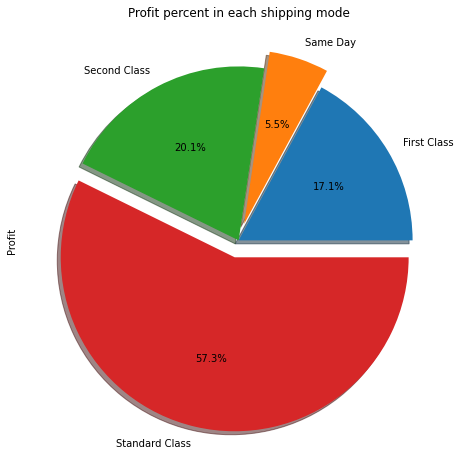

In [28]:
# profit vs ship mode
plt.figure(figsize=(10,8))
df.groupby('Ship Mode').Profit.sum().plot.pie(autopct='%1.1f%%',explode=(0,0.1,0,0.1),shadow=True)
plt.title('Profit percent in each shipping mode')
plt.show()

`standard class is making the highest profit and same day shipping is making the least profit`

<Figure size 1080x720 with 0 Axes>

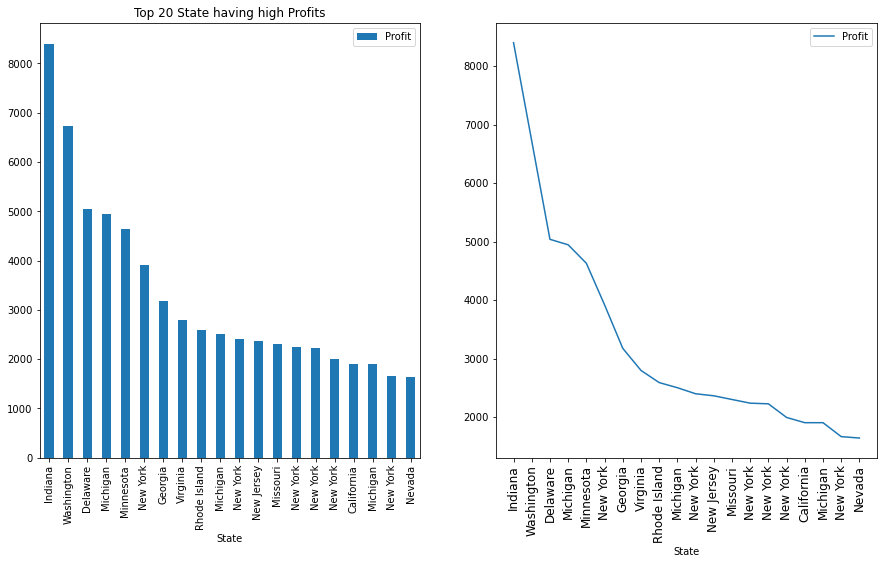

In [29]:
plt.figure(figsize=(15,10))
sortedTop20 = df.sort_values(['Profit'], ascending=False).head(20)
t_tick=list(sortedTop20['State'])

fig, ((ax1, ax2)) = plt.subplots(1, 2)
ax1.set_title("Top 20 State having high Profits")
sortedTop20.plot('State','Profit',kind='bar',ax=ax1)

sortedTop20.plot(x='State',y='Profit',kind='line',figsize=(15,8),ax=ax2)
plt.xticks(list(range(len(t_tick))),t_tick,fontsize=12,rotation=90)

plt.show()

`these are the top 20 states which are making higher profit, and the indiana is the highest profit making state`

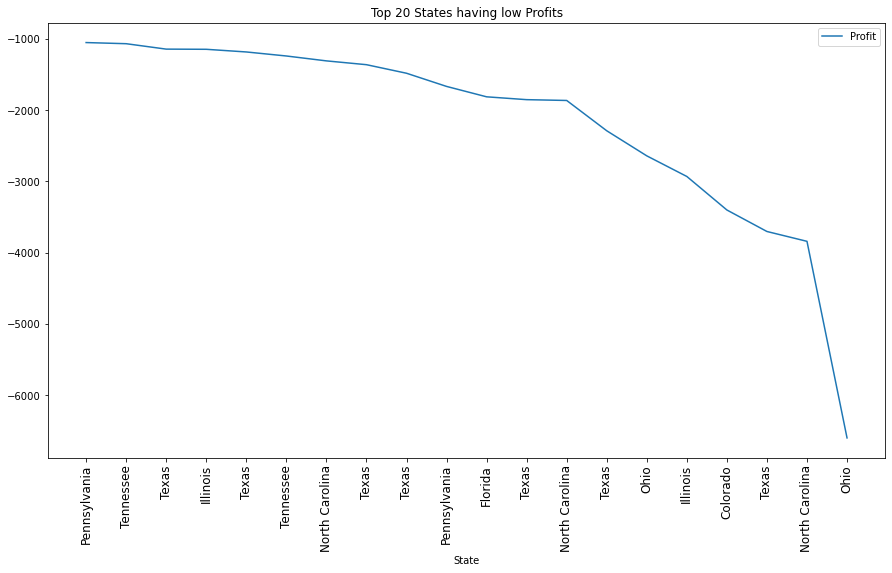

In [30]:
sortedbtm20=df.sort_values(['Profit'],ascending=False).tail(20)
b_tick=list(sortedbtm20['State'])
sortedbtm20.plot(x='State',y='Profit',kind='line',figsize=(15,8))
plt.xticks(list(range(len(b_tick))),b_tick,fontsize=12,rotation=90)
plt.title('Top 20 States having low Profits')
plt.show()

`these are top 20 lose making state and the most lose making state is chio`

### Conclusion

`1) The state which is going in huge loss,the sales of that state should be decreased especially in furniture because the selling price of furniture is high but profit is very less.`

`2) And, to manage the decreased sale in the state which is making huge loss, that sale should be transfered in the state which is making huge profit like california,washington,etc.`

`3) Also we have seen some states where the sale is in limited amount but the profit is some where about 50% or more,so we should extend the sale in these states by bringing the products from the states which are making huge loss.`

# Thank You!